In [1]:
import json

from matplotlib import pyplot as plt
import pandas as pd
import pickle
import os

## Consolidated Results For Finetuning

In [37]:
# load the consolidated results and graph the performance of balanced and extended labels
DIR = "."
df = pd.read_csv(os.path.join(DIR, 'finetune_results.csv'))
df

,model,labeling,split_percent,pretrain,loss,tp,fp,tn,fn,accuracy,precision,recall,auc,f1,f0.5
0,BEN,balanced,100,False,0.394389,1889.0,554.0,1479.0,142.0,0.828740,0.773230,0.930084,0.895239,0.844435,0.819286
1,BEN,expanded,100,False,0.459749,5007.0,1836.0,3652.0,481.0,0.788903,0.731697,0.912354,0.860625,0.812100,0.783405
2,BEN,expanded,1,False,0.632764,4655.0,1811.0,3677.0,833.0,0.759111,0.719920,0.848214,0.815952,0.778819,0.758143
3,BEN,expanded,3,False,0.507432,5027.0,2054.0,3437.0,458.0,0.771137,0.709928,0.916500,0.831861,0.800095,0.767598
4,BEN,expanded,10,False,0.482517,4336.0,1408.0,4084.0,1148.0,0.767128,0.754875,0.790664,0.841841,0.772355,0.766439
5,BEN,balanced,3,False,0.468172,1602.0,472.0,1560.0,430.0,0.778051,0.772420,0.788386,0.864622,0.780321,0.777670
6,BEN,balanced,1,False,0.601744,1736.0,718.0,1313.0,297.0,0.750246,0.707416,0.853911,0.799443,0.773791,0.750324
7,BEN,balanced,25,False,0.429256,1755.0,500.0,1531.0,278.0,0.808563,0.778270,0.863256,0.880372,0.818563,0.804677
8,BEN,expanded,25,False,0.467871,4880.0,1690.0,3795.0,611.0,0.790361,0.742770,0.888727,0.855676,0.809220,0.785787
9,BEN,expanded,50,False,0.474145,4275.0,1234.0,4255.0,1212.0,0.777150,0.776003,0.779114,0.854385,0.777555,0.777037


In [38]:
df2 = pd.read_csv(os.path.join(DIR, 'supervised_results.csv'))
df2 = df2.drop(['Unnamed: 0'], axis = 1)
df2

,model_type,split_percent,pretrain,architecture,loss,tp,fp,tn,fn,accuracy,precision,recall,auc,f1,f0.5
0,supervised_baseline,100,False,InceptionV3,0.186335,1969.0,217.0,1788.0,26.0,0.939250,0.900732,0.986967,0.973556,0.941880,0.927752
1,supervised_baseline,100,False,ResNet101V2,0.186999,1953.0,222.0,1785.0,40.0,0.934500,0.897931,0.979930,0.973764,0.937140,0.923695
2,supervised_baseline,100,False,ResNet152,0.243032,1926.0,235.0,1795.0,108.0,0.915600,0.891254,0.946903,0.951272,0.918236,0.909062
3,supervised_baseline,100,False,ResNet50,0.186086,1947.0,209.0,1784.0,60.0,0.932750,0.903061,0.970105,0.970995,0.935383,0.924355
4,supervised_baseline,100,False,Xception,0.170726,1983.0,222.0,1776.0,19.0,0.939750,0.899320,0.990510,0.976170,0.942715,0.927792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,supervised_baseline_pretrained_ex,50,True,InceptionV3,0.427894,4975.0,1561.0,3929.0,511.0,0.811224,0.761169,0.906854,0.891291,0.827649,0.804235
116,supervised_baseline_pretrained_ex,50,True,ResNet101V2,0.379863,4707.0,1044.0,4447.0,778.0,0.834001,0.818466,0.858159,0.909031,0.837843,0.831283
117,supervised_baseline_pretrained_ex,50,True,ResNet152,0.515150,4587.0,1462.0,4027.0,900.0,0.784803,0.758307,0.835976,0.863440,0.795250,0.782542
118,supervised_baseline_pretrained_ex,50,True,ResNet50,0.604424,4641.0,1410.0,4082.0,843.0,0.794734,0.766981,0.846280,0.863395,0.804681,0.791709


In [39]:
_df2 = df2[(df2.model_type.isin(['supervised_baseline'])) & 
           (df2.architecture == 'ResNet152') &
           (df2.pretrain == False)]
_df2 = _df2.rename(columns = {'model_type' : 'model'})
_df2['model'] = 'supervised'
_df2

,model,split_percent,pretrain,architecture,loss,tp,fp,tn,fn,accuracy,precision,recall,auc,f1,f0.5
2,supervised,100,False,ResNet152,0.243032,1926.0,235.0,1795.0,108.0,0.915600,0.891254,0.946903,0.951272,0.918236,0.909062
7,supervised,10,False,ResNet152,0.303365,1907.0,341.0,1692.0,124.0,0.885581,0.848310,0.938946,0.939483,0.891330,0.876513
12,supervised,1,False,ResNet152,0.455079,1349.0,221.0,1809.0,685.0,0.777067,0.859236,0.663225,0.902077,0.748613,0.782180
17,supervised,25,False,ResNet152,0.274974,2021.0,361.0,1668.0,14.0,0.907726,0.848447,0.993120,0.947509,0.915101,0.891749
22,supervised,3,False,ResNet152,0.439815,1425.0,162.0,1871.0,606.0,0.811024,0.897921,0.701625,0.919590,0.787728,0.821326
27,supervised,50,False,ResNet152,0.193318,1986.0,210.0,1820.0,48.0,0.936516,0.904372,0.976401,0.964253,0.939007,0.927171


In [79]:
def plot_results(plot_df, xlab, ylab, title = None):
    _title = "Accuracy for different CNN Architectures" if not title else title
    
    plot_df.plot(kind="bar", figsize=(12,8), #marker = '.',
                 rot=0, ylim=(0.4, 1.0), fontsize=16)
    plt.title(_title, fontsize=20)
    plt.legend(fontsize=14, loc = 'lower right')
    plt.xlabel(xlab, fontsize=16)
    plt.ylabel(ylab, fontsize=16)
    
def convert_to_plot(df, score, series, xlbl):
    plot_df = df[[score, series, xlbl]]
    plot_df = plot_df.pivot(
        index= xlbl, 
        columns= series, 
        values= score
    ).sort_values(xlbl, ascending=True)
    return plot_df

def display_results(dataframe, title, save=False):
    display(dataframe)
    plot_df = convert_to_plot(dataframe, 'accuracy', "model", "split_percent",)
    plot_results(plot_df, "Split Percentage", "Accuracy", f'Accuracy for {title}')
    if save:
        plt.savefig("finetune_accuracy.png")
    
    plot_df = convert_to_plot(dataframe, 'f1' , "model", "split_percent")
    plot_results(plot_df, "Split Percentage", "F1-Score",
                         f'F1 score for {title}')
    if save:
        plt.savefig("finetune_f1.png")

In [80]:
# also get information for pretrained supervised
_df3 = df2[(df2.model_type.isin(['supervised_baseline_pretrained'])) & 
           (df2.architecture == 'ResNet152') &
           (df2.pretrain == True)]
_df3 = _df3.rename(columns = {'model_type' : 'model'})
_df3['model'] = 'supervised_pretrained'
_df3

,model,split_percent,pretrain,architecture,loss,tp,fp,tn,fn,accuracy,precision,recall,auc,f1,f0.5
62,supervised_pretrained,100,True,ResNet152,0.438497,1593.0,304.0,1727.0,440.0,0.816929,0.839747,0.783571,0.903257,0.810687,0.820148
67,supervised_pretrained,10,True,ResNet152,0.759526,1162.0,246.0,1787.0,869.0,0.725640,0.825284,0.572132,0.851404,0.675778,0.719208
72,supervised_pretrained,1,True,ResNet152,1.299277,1111.0,278.0,1753.0,922.0,0.704724,0.799856,0.546483,0.804429,0.649328,0.692787
77,supervised_pretrained,25,True,ResNet152,0.524251,1800.0,623.0,1409.0,232.0,0.789616,0.742881,0.885827,0.872730,0.808081,0.785112
82,supervised_pretrained,3,True,ResNet152,0.645926,1506.0,446.0,1586.0,526.0,0.760827,0.771516,0.741142,0.843999,0.756024,0.761119
87,supervised_pretrained,50,True,ResNet152,0.457285,1467.0,291.0,1746.0,560.0,0.790600,0.834471,0.723730,0.889169,0.775165,0.793974


In [81]:
# merge the supervised dataset with the simclr results for common graphing
new_data = pd.concat([_df2, df[df["labeling"] == "balanced"], _df3])
new_data

,model,split_percent,pretrain,architecture,loss,tp,fp,tn,fn,accuracy,precision,recall,auc,f1,f0.5,labeling
2,supervised,100,False,ResNet152,0.243032,1926.0,235.0,1795.0,108.0,0.915600,0.891254,0.946903,0.951272,0.918236,0.909062,NaN
7,supervised,10,False,ResNet152,0.303365,1907.0,341.0,1692.0,124.0,0.885581,0.848310,0.938946,0.939483,0.891330,0.876513,NaN
12,supervised,1,False,ResNet152,0.455079,1349.0,221.0,1809.0,685.0,0.777067,0.859236,0.663225,0.902077,0.748613,0.782180,NaN
17,supervised,25,False,ResNet152,0.274974,2021.0,361.0,1668.0,14.0,0.907726,0.848447,0.993120,0.947509,0.915101,0.891749,NaN
22,supervised,3,False,ResNet152,0.439815,1425.0,162.0,1871.0,606.0,0.811024,0.897921,0.701625,0.919590,0.787728,0.821326,NaN
27,supervised,50,False,ResNet152,0.193318,1986.0,210.0,1820.0,48.0,0.936516,0.904372,0.976401,0.964253,0.939007,0.927171,NaN
0,BEN,100,False,NaN,0.394389,1889.0,554.0,1479.0,142.0,0.828740,0.773230,0.930084,0.895239,0.844435,0.819286,balanced
5,BEN,3,False,NaN,0.468172,1602.0,472.0,1560.0,430.0,0.778051,0.772420,0.788386,0.864622,0.780321,0.777670,balanced
6,BEN,1,False,NaN,0.601744,1736.0,718.0,1313.0,297.0,0.750246,0.707416,0.853911,0.799443,0.773791,0.750324,balanced
7,BEN,25,False,NaN,0.429256,1755.0,500.0,1531.0,278.0,0.808563,0.778270,0.863256,0.880372,0.818563,0.804677,balanced


,model,split_percent,pretrain,architecture,loss,tp,fp,tn,fn,accuracy,precision,recall,auc,f1,f0.5,labeling
2,supervised,100,False,ResNet152,0.243032,1926.0,235.0,1795.0,108.0,0.915600,0.891254,0.946903,0.951272,0.918236,0.909062,NaN
7,supervised,10,False,ResNet152,0.303365,1907.0,341.0,1692.0,124.0,0.885581,0.848310,0.938946,0.939483,0.891330,0.876513,NaN
12,supervised,1,False,ResNet152,0.455079,1349.0,221.0,1809.0,685.0,0.777067,0.859236,0.663225,0.902077,0.748613,0.782180,NaN
17,supervised,25,False,ResNet152,0.274974,2021.0,361.0,1668.0,14.0,0.907726,0.848447,0.993120,0.947509,0.915101,0.891749,NaN
22,supervised,3,False,ResNet152,0.439815,1425.0,162.0,1871.0,606.0,0.811024,0.897921,0.701625,0.919590,0.787728,0.821326,NaN
27,supervised,50,False,ResNet152,0.193318,1986.0,210.0,1820.0,48.0,0.936516,0.904372,0.976401,0.964253,0.939007,0.927171,NaN
0,SimCLR-S2 BEN,100,False,NaN,0.394389,1889.0,554.0,1479.0,142.0,0.828740,0.773230,0.930084,0.895239,0.844435,0.819286,balanced
5,SimCLR-S2 BEN,3,False,NaN,0.468172,1602.0,472.0,1560.0,430.0,0.778051,0.772420,0.788386,0.864622,0.780321,0.777670,balanced
6,SimCLR-S2 BEN,1,False,NaN,0.601744,1736.0,718.0,1313.0,297.0,0.750246,0.707416,0.853911,0.799443,0.773791,0.750324,balanced
7,SimCLR-S2 BEN,25,False,NaN,0.429256,1755.0,500.0,1531.0,278.0,0.808563,0.778270,0.863256,0.880372,0.818563,0.804677,balanced


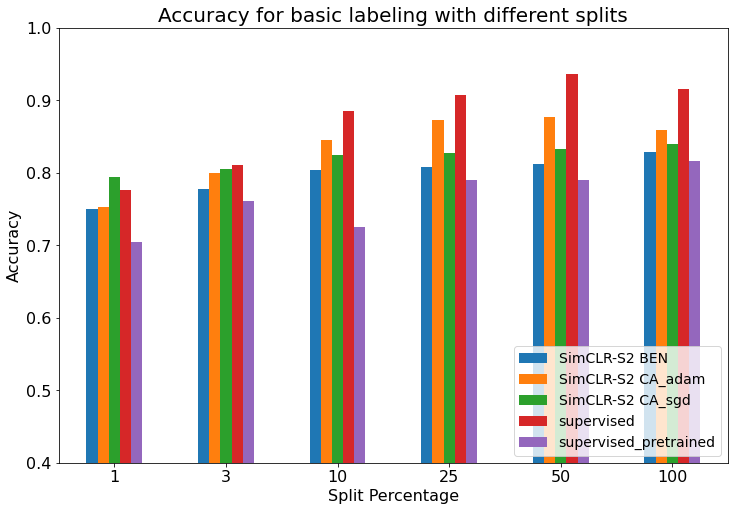

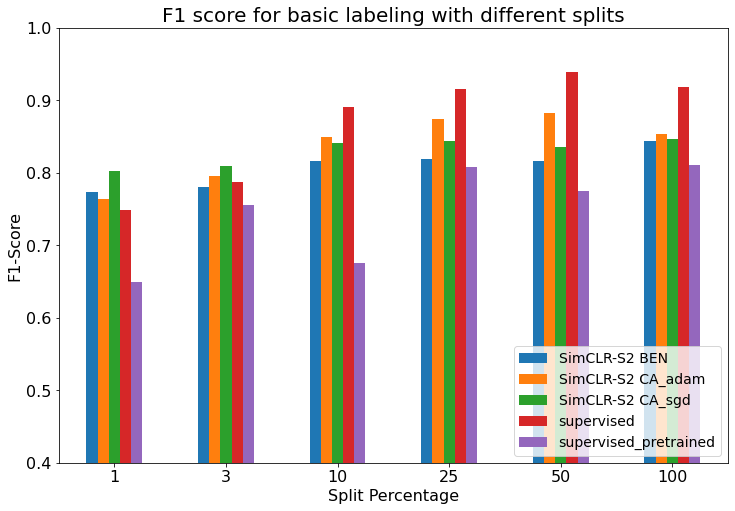

In [82]:
def add_simclr(val):
    if val.startswith("supervised"):
        return val
    return f"SimCLR-S2 {val}"
new_data["model"] = new_data["model"].apply(add_simclr)

display_results(new_data, 'basic labeling with different splits', True)